# IMD1151 - CIÊNCIAS DE DADOS - T01 (2025.1)

## 📊 Resultados do Censo Escolar 2024

**Tema:**
Números de alunos da Educação Básica na **Educação Especial** (Inclusiva ou Exclusiva)

**Fonte:**  
[gov.br - INEP - Censo Escolar 2024](https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/censo-escolar/resultados)

---

**Aluno:** Douglas Alexandre dos Santos  
**Matrícula:** 20210096853


Carregando os dataframes com os dados já tratados

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
palette = sns.color_palette('muted')
sns.set_theme(style='darkgrid')
privadas = pd.read_csv('../data/private_school_Brazil_2024.csv', sep=';')
publicas = pd.read_csv('../data/public_school_Brazil_2024.csv', sep=';')

In [2]:
print('Número de escolar públicas: {}'.format(len(publicas)))
print('Número de escolar privadas: {}'.format(len(privadas)))

Número de escolar públicas: 136844
Número de escolar privadas: 42442


In [ ]:
principais_colunas = ['QT_MAT_BAS', 'QT_MAT_ESP', 
                      'QT_TUR_BAS', 'QT_TUR_ESP']

In [3]:
print(publicas[principais_colunas].describe())

          QT_MAT_BAS     QT_MAT_ESP     QT_TUR_BAS     QT_TUR_ESP
count  136844.000000  136844.000000  136844.000000  136844.000000
mean      274.554164      12.908414      12.209596       6.820906
std       300.671862      16.829798      10.188500       7.182812
min         1.000000       0.000000       1.000000       0.000000
25%        72.000000       1.000000       5.000000       1.000000
50%       177.000000       7.000000      10.000000       5.000000
75%       374.000000      18.000000      16.000000      10.000000
max     16500.000000     551.000000     252.000000     114.000000


In [4]:
print(privadas[principais_colunas].describe())

         QT_MAT_BAS    QT_MAT_ESP    QT_TUR_BAS    QT_TUR_ESP
count  42442.000000  42442.000000  42442.000000  42442.000000
mean     224.255030      7.313180     13.035295      3.532491
std      395.715057     22.056627     12.060849      5.939775
min        1.000000      0.000000      1.000000      0.000000
25%       63.000000      0.000000      6.000000      0.000000
50%      126.000000      2.000000     10.000000      2.000000
75%      263.000000      6.000000     16.000000      4.000000
max    36822.000000   1361.000000    660.000000    366.000000


## 🎯 Problema a ser explorado

**"Há desigualdade na oferta de Educação Especial (inclusiva ou exclusiva) entre escolas públicas e privadas nas diferentes regiões do Brasil?"**

Questões sobre o perfil das escolas brasileiras, especialmente com foco na Educação Especial.

---

## 🔍 Podemos explorar...

### 📌 O perfil geral das escolas:

#### Quantidade de escolas (pública e privada) existem por região

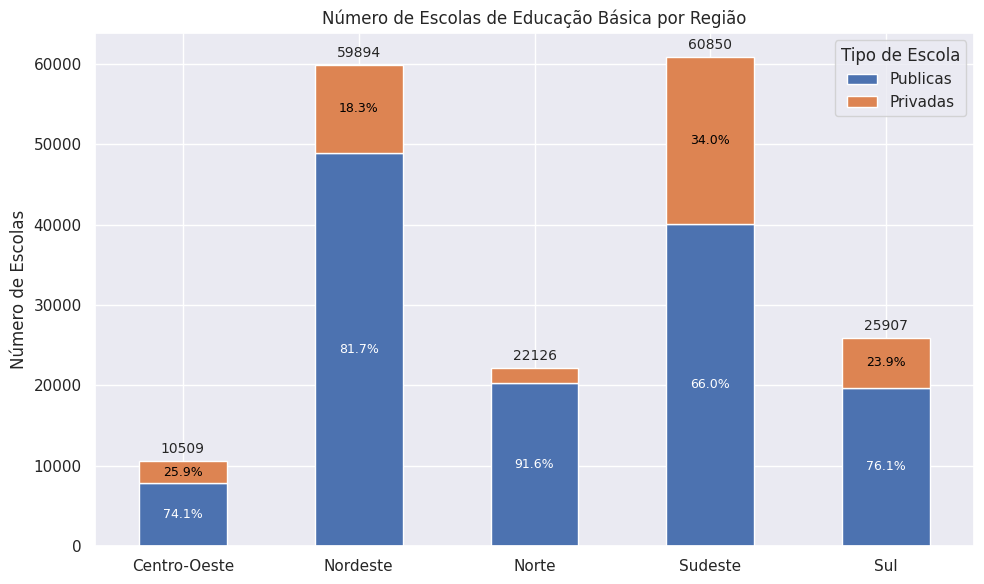

In [5]:
#Tomar cuidado com a ordem das regiões
# ['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']
dados = {
    "Regiao": sorted(list(set(publicas['NO_REGIAO']))),
    # a ordem dos dados influencia para associar a região
    "Publicas": publicas.groupby('NO_REGIAO')['NO_ENTIDADE'].count().to_dict().values(),
    "Privadas": privadas.groupby('NO_REGIAO')['NO_ENTIDADE'].count().to_dict().values()
}
df = pd.DataFrame(dados)

# Gráfico de barras agrupadas
df.set_index("Regiao", inplace=True)
ax = df.plot(kind='bar', figsize=(10, 6), stacked=True)

#Adicionar os rotulos de porcentagens nas barras
for i, (pub, priv) in enumerate(zip(df['Publicas'], df['Privadas'])):
    total = pub + priv

    # ax.text(x, y, texto, ...)
    # x - posição no eixo horizontal (a barra de cada região)
    # y - altura vertical onde o texto será colocado
    # texto - o que será escrito
    ax.text(i, pub/2, f'{(pub/total)*100:.1f}%', ha='center', va='center',
            color='white', fontsize=9)
    #Já que não tem espaço para escrever a porcentagem na terceira barra
    if(i != 2):
        ax.text(i, pub + priv/2, f'{(priv/total)*100:.1f}%', ha='center', va='center',
            color='black', fontsize=9)
    #Rotulo superior onde será exibido a quantidade absoluta de escolas
    ax.text(i, pub + priv + 1000, f'{pub+priv}', ha='center', fontsize=10)

# Customizando titulo, labels e legendas
plt.title("Número de Escolas de Educação Básica por Região")
plt.ylabel("Número de Escolas")
plt.xlabel("")
plt.xticks(rotation=360)
plt.legend(title="Tipo de Escola")
plt.tight_layout()
plt.show()

#### Quantidade de escolas (pública e privada) existem por Estado

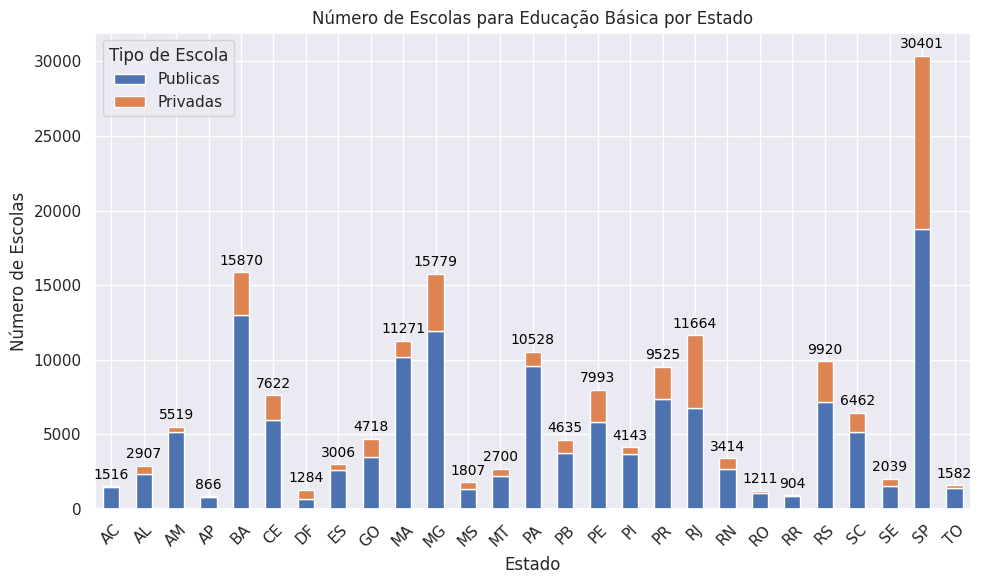

In [6]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['SG_UF']))),
    # a ordem dos dados influencia para associar a região
    "Publicas": publicas.groupby('SG_UF')['NO_ENTIDADE'].count().to_dict().values(),
    "Privadas": privadas.groupby('SG_UF')['NO_ENTIDADE'].count().to_dict().values()
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)

# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=True, )
for i, (pub, priv) in enumerate(zip(df['Publicas'], df['Privadas'])):
    ax.text(i, pub/2, '')
    ax.text(i, pub + priv + 500, f'{pub+priv}', ha='center', color='black', fontsize=10)
plt.title("Número de Escolas para Educação Básica por Estado")
plt.ylabel("Número de Escolas")
plt.xlabel("Estado")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Escola")
plt.tight_layout()
plt.show()

#### Boxplot do número de matrículas por tipo de escola (pública/privada)

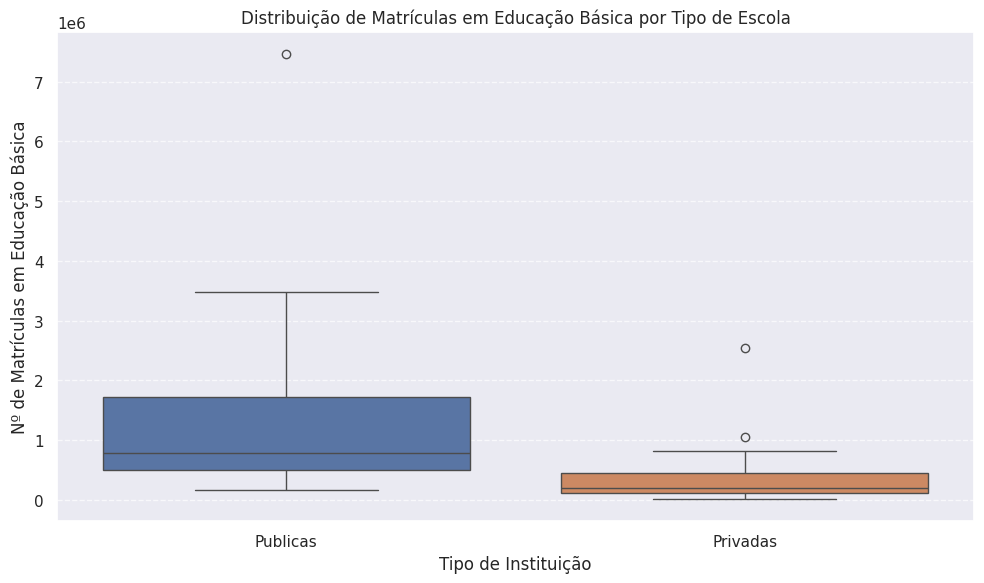

In [14]:
dados = {
    "Regiao": sorted(list(set(publicas['SG_UF']))),
    # a ordem dos dados influencia para associar a região
    "Publicas": publicas.groupby('SG_UF')['QT_MAT_BAS'].sum().to_dict().values(),
    "Privadas": privadas.groupby('SG_UF')['QT_MAT_BAS'].sum().to_dict().values()
}

plt.figure(figsize=(10, 6))
sns.boxplot(data=dados)
plt.title("Distribuição de Matrículas em Educação Básica por Tipo de Escola")
plt.xlabel("Tipo de Instituição")
plt.ylabel('Nº de Matrículas em Educação Básica')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Média de matrículas por região

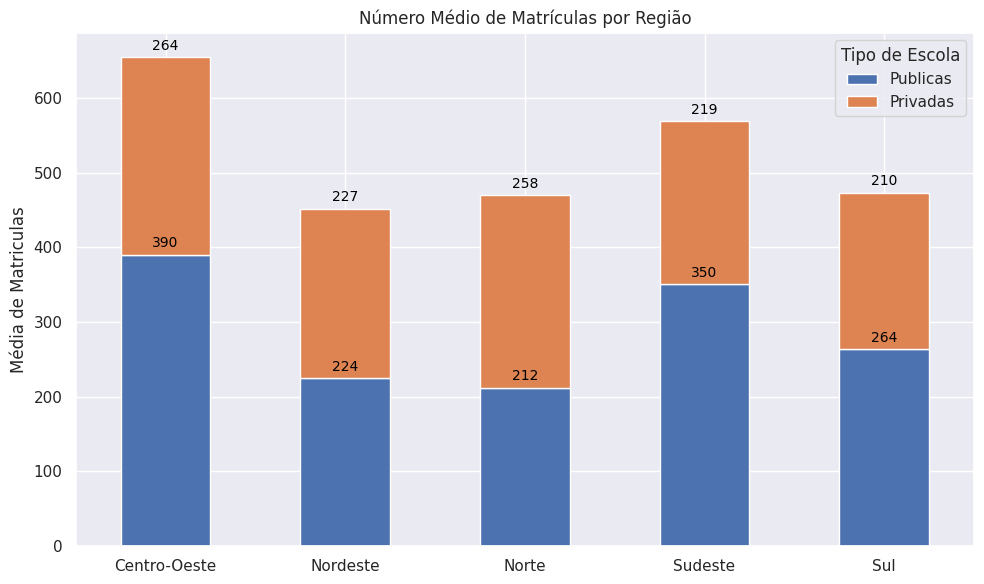

In [15]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['NO_REGIAO']))),
    # a ordem dos dados influencia para associar a região
    "Publicas": publicas.groupby('NO_REGIAO')['QT_MAT_BAS'].mean().to_dict().values(),
    "Privadas": privadas.groupby('NO_REGIAO')['QT_MAT_BAS'].mean().to_dict().values()
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)
# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=True)
for i, (pub, priv) in enumerate(zip(df['Publicas'], df['Privadas'])):
    ax.text(i, pub/2, '')
    ax.text(i, pub + 10, f'{pub:.0f}', ha='center', color='black', fontsize=10)
    ax.text(i, pub + priv + 10, f'{priv:.0f}', ha='center', color='black', fontsize=10)
plt.title("Número Médio de Matrículas por Região")
plt.ylabel("Média de Matriculas")
plt.xlabel("")
plt.xticks(rotation=360)
plt.legend(title="Tipo de Escola")
plt.tight_layout()
plt.show()

#### Média de matrículas por estado

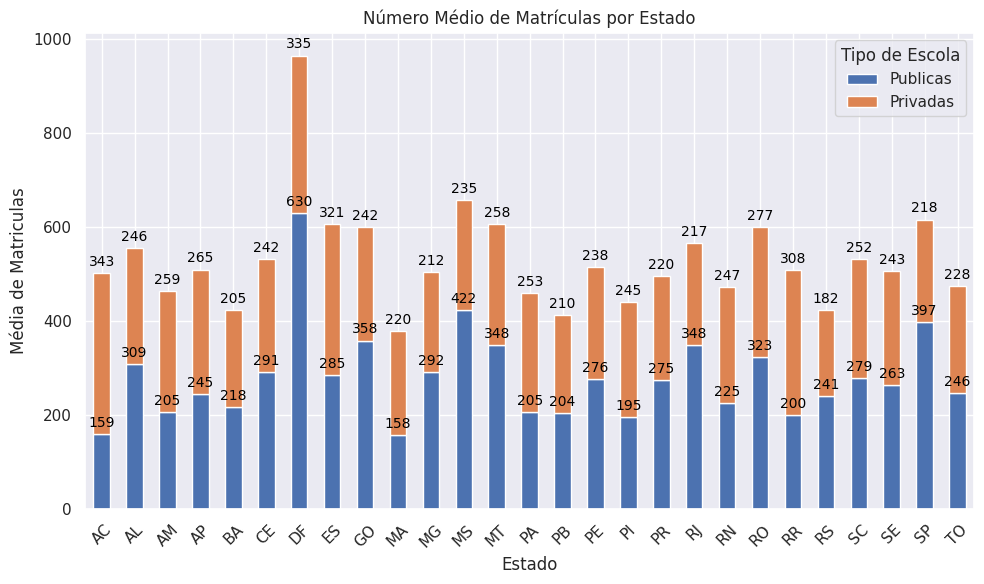

In [16]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['SG_UF']))),
    # a ordem dos dados influencia para associar a região
    "Publicas": publicas.groupby('SG_UF')['QT_MAT_BAS'].mean().to_dict().values(),
    "Privadas": privadas.groupby('SG_UF')['QT_MAT_BAS'].mean().to_dict().values()
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)
# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=True)
for i, (pub, priv) in enumerate(zip(df['Publicas'], df['Privadas'])):
    ax.text(i, pub/2, '')
    ax.text(i, pub + 15, f'{pub:.0f}', ha='center', color='black', fontsize=10)
    ax.text(i, pub + priv + 15, f'{priv:.0f}', ha='center', color='black', fontsize=10)
plt.title("Número Médio de Matrículas por Estado")
plt.ylabel("Média de Matriculas")
plt.xlabel("Estado")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Escola")
plt.tight_layout()
plt.show()

### 🧠 Educação Especial

#### Quantas escolas oferecem Educação Especial, por região?

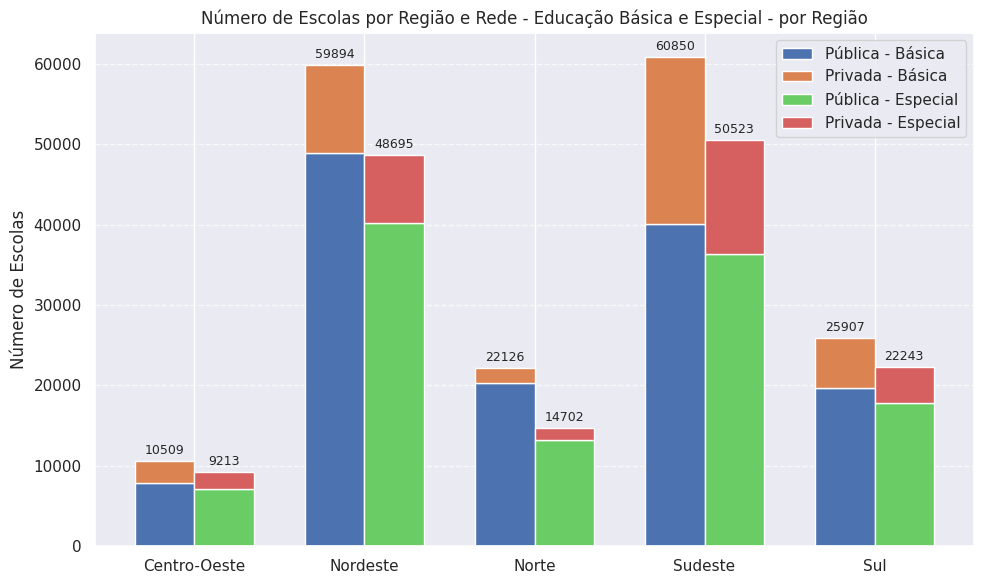

In [24]:
regiao = sorted(list(set(publicas['NO_REGIAO'])))
pub_bas = list(publicas.groupby('NO_REGIAO')['NO_ENTIDADE'].count().to_dict().values())
priv_bas = list(privadas.groupby('NO_REGIAO')['NO_ENTIDADE'].count().to_dict().values())
pub_esp = list(publicas[publicas['IN_ESP'] == 1].groupby('NO_REGIAO')['NO_ENTIDADE'].count().to_dict().values())
priv_esp = list(privadas[privadas['IN_ESP'] == 1].groupby('NO_REGIAO')['NO_ENTIDADE'].count().to_dict().values())
# Posições para os grupos de barras
x = np.arange(len(regiao))
width = 0.35  # Largura das barras

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x - width/2, pub_bas, width, label='Pública - Básica', color='#4c72b0')
bar2 = ax.bar(x - width/2, priv_bas, width, bottom=pub_bas, label='Privada - Básica', color='#db8452')

bar3 = ax.bar(x + width/2, pub_esp, width, label='Pública - Especial', color='#6acc64')
bar4 = ax.bar(x + width/2, priv_esp, width, bottom=pub_esp, label='Privada - Especial', color='#d65f5f')

for i in range(len(x)):
    total_bas = pub_bas[i] + priv_bas[i]
    total_esp = pub_esp[i] + priv_esp[i]
    ax.text(x[i] - width/2, total_bas + 500, str(total_bas), ha='center', va='bottom', fontsize=9)
    ax.text(x[i] + width/2, total_esp + 500, str(total_esp), ha='center', va='bottom', fontsize=9)
    
ax.set_ylabel('Número de Escolas')
ax.set_title('Número de Escolas por Região e Rede - Educação Básica e Especial - por Região')
ax.set_xticks(x)
ax.set_xticklabels(regiao)
ax.legend()

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Quantas escolas oferecem Educação Especial, por estado?

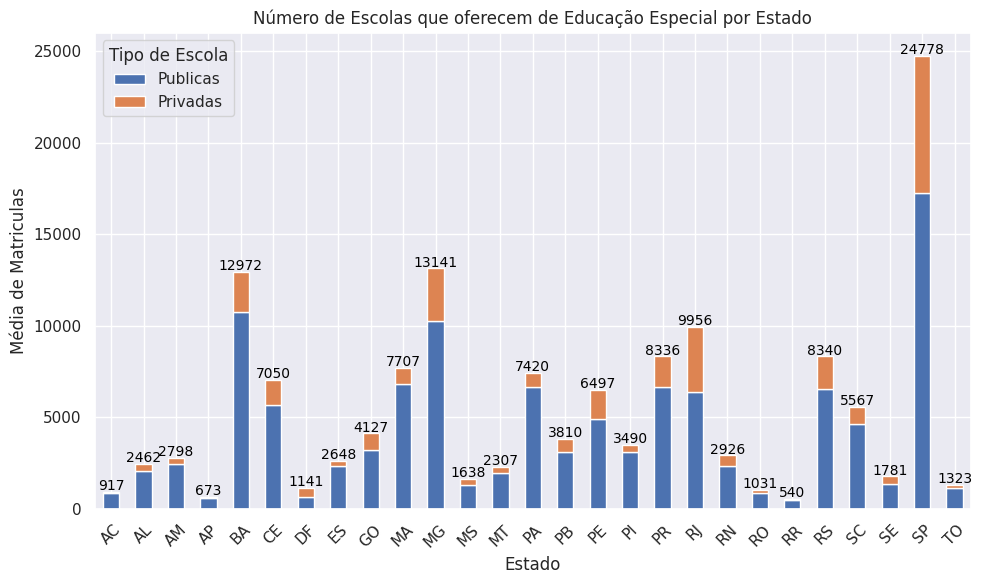

In [26]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['SG_UF']))),
    # a ordem dos dados influencia para associar a região
    "Publicas": publicas[publicas['IN_ESP'] == 1].groupby('SG_UF')['NO_ENTIDADE'].count().to_dict().values(),
    "Privadas": privadas[privadas['IN_ESP'] == 1].groupby('SG_UF')['NO_ENTIDADE'].count().to_dict().values(),
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)
# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=True)
for i, (pub, priv) in enumerate(zip(df['Publicas'], df['Privadas'])):
    ax.text(i, pub/2, '')
    ax.text(i, pub + priv + 100, f'{pub+priv}', ha='center', color='black', fontsize=10)
plt.title("Número de Escolas que oferecem de Educação Especial por Estado")
plt.ylabel("Média de Matriculas")
plt.xlabel("Estado")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Escola")
plt.tight_layout()
plt.show()

#### Qual o total de matrículas na Educação Especial por região?

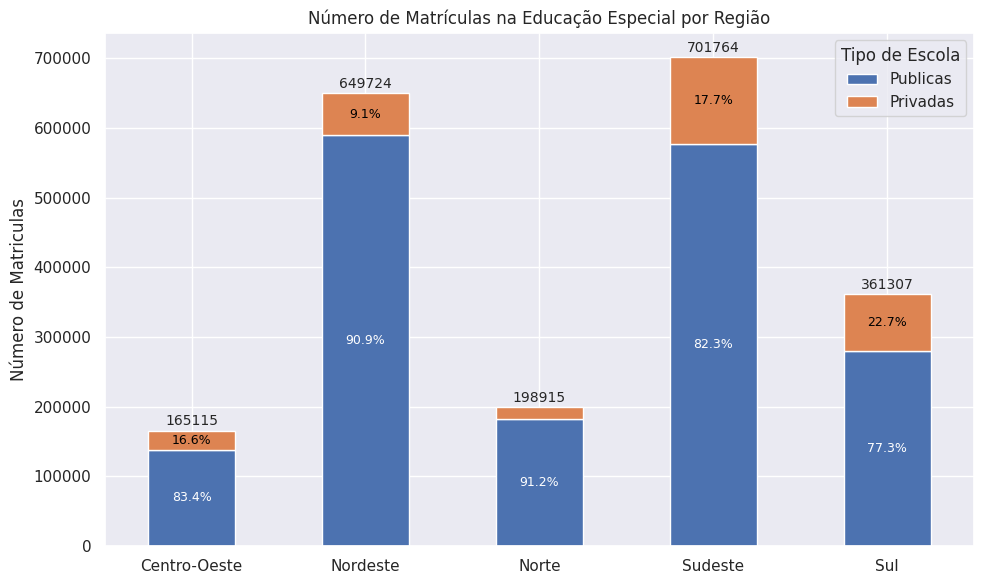

In [214]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['NO_REGIAO']))),
    # a ordem dos dados influencia para associar a região
    "Publicas": publicas.groupby('NO_REGIAO')['QT_MAT_ESP'].sum().to_dict().values(),
    "Privadas": privadas.groupby('NO_REGIAO')['QT_MAT_ESP'].sum().to_dict().values()
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)
# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=True)
#Adicionar os rotulos de porcentagens nas barras
for i, (pub, priv) in enumerate(zip(df['Publicas'], df['Privadas'])):
    total = pub + priv

    # ax.text(x, y, texto, ...)
    # x - posição no eixo horizontal (a barra de cada região)
    # y - altura vertical onde o texto será colocado
    # texto - o que será escrito
    ax.text(i, pub/2, f'{(pub/total)*100:.1f}%', ha='center', va='center',
            color='white', fontsize=9)
    #Já que não tem espaço para escrever a porcentagem na terceira barra
    if(i != 2):
        ax.text(i, pub + priv/2, f'{(priv/total)*100:.1f}%', ha='center', va='center',
            color='black', fontsize=9)
    #Rotulo superior onde será exibido a quantidade absoluta de escolas
    ax.text(i, pub + priv + 8000, f'{pub+priv:.0f}', ha='center', fontsize=10)
plt.title("Número de Matrículas na Educação Especial por Região")
plt.ylabel("Número de Matriculas")
plt.xlabel("")
plt.xticks(rotation=360)
plt.legend(title="Tipo de Escola")
plt.tight_layout()
plt.show()

#### Qual o total de matrículas na Educação Especial por estado?

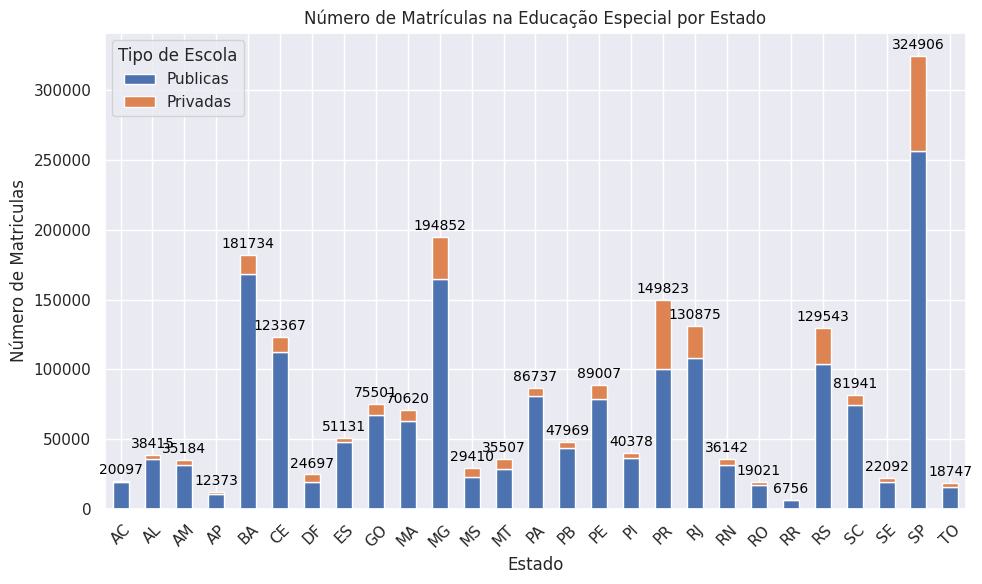

In [215]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['SG_UF']))),
    # a ordem dos dados influencia para associar a região
    "Publicas": publicas.groupby('SG_UF')['QT_MAT_ESP'].sum().to_dict().values(),
    "Privadas": privadas.groupby('SG_UF')['QT_MAT_ESP'].sum().to_dict().values()
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)
# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=True)
for i, (pub, priv) in enumerate(zip(df['Publicas'], df['Privadas'])):
    ax.text(i, pub/2, '')
    ax.text(i, pub + priv + 5000, f'{pub+priv:.0f}', ha='center', color='black', fontsize=10)
plt.title("Número de Matrículas na Educação Especial por Estado")
plt.ylabel("Número de Matriculas")
plt.xlabel("Estado")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Escola")
plt.tight_layout()
plt.show()

#### Proporção entre Educação Especial Inclusiva x Exclusiva por estado na rede pública

In [108]:
regiao = sorted(list(set(publicas['SG_UF'])))
pub_cc = publicas.groupby('SG_UF')['QT_MAT_ESP_CC'].sum().to_dict().values()
pub_ce = publicas.groupby('SG_UF')['QT_MAT_ESP_CE'].sum().to_dict().values()
aux = []
for i, (cc, ce) in enumerate(zip(pub_cc, pub_ce)):
    total = cc + ce
    med = (ce/total)*100
    aux.append(med)
    
media = sum(aux)/len(aux)
print('Proporção da Educação Especial Exclusiva nos Estados')
print(aux)
print('Taxa máxima: {} no {}'.format(max(aux), regiao[aux.index(max(aux))]))
print('Taxa minima: {}'.format(min(aux)))
print('Taxa média: {}'.format(media))

Proporção da Educação Especial Exclusiva nos Estados
[1.4576342281879195, 0.1609948370621218, 6.082165905871242, 0.09139097057210747, 0.4226698248176049, 0.4929165410734233, 6.177047825637847, 0.0, 2.2891422431803257, 0.9930063306126959, 1.9584177391768458, 0.14530403769098676, 2.148021375432224, 0.39802224969097655, 0.5501558774986246, 0.7724754789856177, 0.2850859330455323, 8.705079620843653, 6.784655300222386, 0.009517766497461928, 0.4141149023038787, 0.0, 2.437733379528044, 0.10159205443195336, 1.6695183284077357, 1.519934525897346, 0.2505299672383889]
Taxa máxima: 8.705079620843653 no PR
Taxa minima: 0.0
Taxa média: 1.7154491571817385


#### Proporção entre Educação Especial Inclusiva x Exclusiva por estado na rede privada

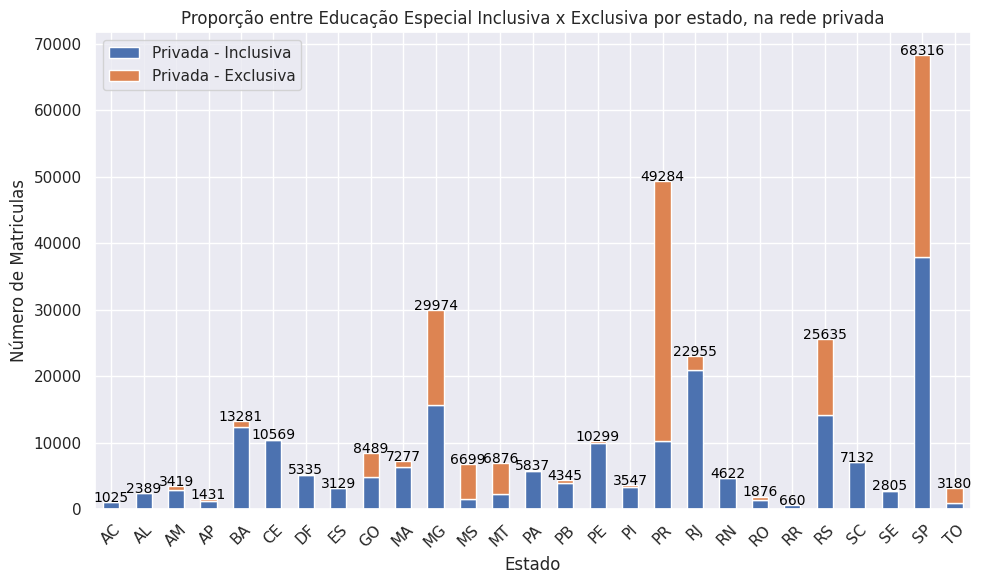

In [28]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['SG_UF']))),
    # a ordem dos dados influencia para associar a região
    "Privada - Inclusiva": privadas.groupby('SG_UF')['QT_MAT_ESP_CC'].sum().to_dict().values(),
    "Privada - Exclusiva": privadas.groupby('SG_UF')['QT_MAT_ESP_CE'].sum().to_dict().values()
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)
# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=True)
for i, (priv_cc, priv_ce) in enumerate(zip(df['Privada - Inclusiva'], df['Privada - Exclusiva'])):
    ax.text(i, priv_cc/2, '')
    ax.text(i, priv_cc + priv_ce+1, f'{priv_cc+priv_ce:.0f}', ha='center', color='black', fontsize=10)
plt.title("Proporção entre Educação Especial Inclusiva x Exclusiva por estado, na rede privada")
plt.ylabel("Número de Matriculas")
plt.xlabel("Estado")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

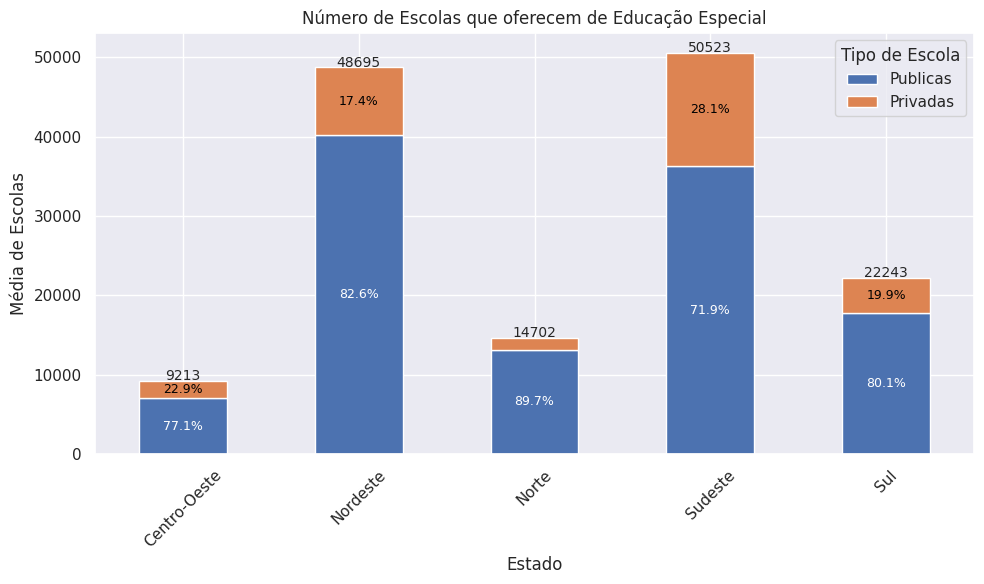

In [29]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['NO_REGIAO']))),
    # == 0 - NÃO oferece Educação Especial
    # == 1 - Oferece Educação Especial
    "Publicas": publicas[publicas['IN_ESP'] == 1].groupby('NO_REGIAO')['NO_ENTIDADE'].count().to_dict().values(),
    "Privadas": privadas[privadas['IN_ESP'] == 1].groupby('NO_REGIAO')['NO_ENTIDADE'].count().to_dict().values(),
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)
# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=True)
#Adicionar os rotulos de porcentagens nas barras
for i, (pub, priv) in enumerate(zip(df['Publicas'], df['Privadas'])):
    total = pub + priv

    # ax.text(x, y, texto, ...)
    # x - posição no eixo horizontal (a barra de cada região)
    # y - altura vertical onde o texto será colocado
    # texto - o que será escrito
    ax.text(i, pub/2, f'{(pub/total)*100:.1f}%', ha='center', va='center',
            color='white', fontsize=9)
    #Já que não tem espaço para escrever a porcentagem na terceira barra
    if(i != 2):
        ax.text(i, pub + priv/2, f'{(priv/total)*100:.1f}%', ha='center', va='center',
            color='black', fontsize=9)
    #Rotulo superior onde será exibido a quantidade absoluta de escolas
    ax.text(i, pub + priv + 100, f'{pub+priv}', ha='center', fontsize=10)
plt.title("Número de Escolas que oferecem de Educação Especial")
plt.ylabel("Média de Escolas")
plt.xlabel("Estado")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Escola")
plt.tight_layout()
plt.show()


#    Observações sobre o grafico:
#
#    No Nordeste:
#        - a região com o maior número de escola sem inclusão
#        - a maioria das escolas publicas NÃO oferecem educação especial
#    No Sudeste:
#        - a maioria das escolas PRIVADAS não oferecem educação especial
#    No Centro-Oeste:
#        - tem o menor total de escolas sem inclusão

#### Comparação número de turmas Básicas, Inclusiva das escolas publicas por região

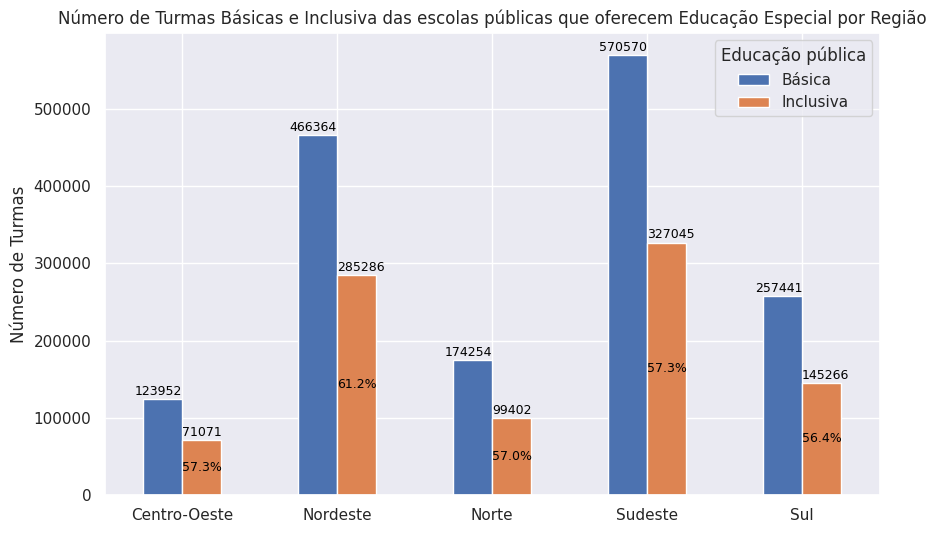

In [30]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['NO_REGIAO']))),
    # a ordem dos dados influencia para associar a região
    "Básica": publicas[publicas['IN_ESP'] == 1].groupby('NO_REGIAO')['QT_TUR_BAS'].sum().to_dict().values(),
    "Inclusiva": publicas[publicas['IN_ESP'] == 1].groupby('NO_REGIAO')['QT_TUR_ESP_CC'].sum().to_dict().values()
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)
# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=False)
# Calculando a média da média de matriculas das escolas
#Adicionar os rotulos de porcentagens nas barras
for i, (pub, pub_cc) in enumerate(zip(df['Básica'], df['Inclusiva'])):
    # ax.text(x, y, texto, ...)
    # x - posição no eixo horizontal (a barra de cada região)
    # y - altura vertical onde o texto será colocado
    # texto - o que será escrito
    ax.text(i, pub+10000, f'{(pub)}', ha='right', va='center',
            color='black', fontsize=9)
    ax.text(i, pub_cc+10000, f'{(pub_cc)}', ha='left', va='center',
            color='black', fontsize=9)
    ax.text(i, pub_cc/2, f'{(pub_cc/pub)*100:.1f}%', ha='left', va='center',
            color='black', fontsize=9)
   
plt.title("Número de Turmas Básicas e Inclusiva das escolas públicas que \
oferecem Educação Especial por Região")
plt.ylabel("Número de Turmas")
plt.xlabel("")
plt.legend(title="Educação pública")
plt.xticks(rotation=360)
plt.show()

#### Comparação número de turmas Básicas, Inclusiva e Exclusiva das escolas privadas por região

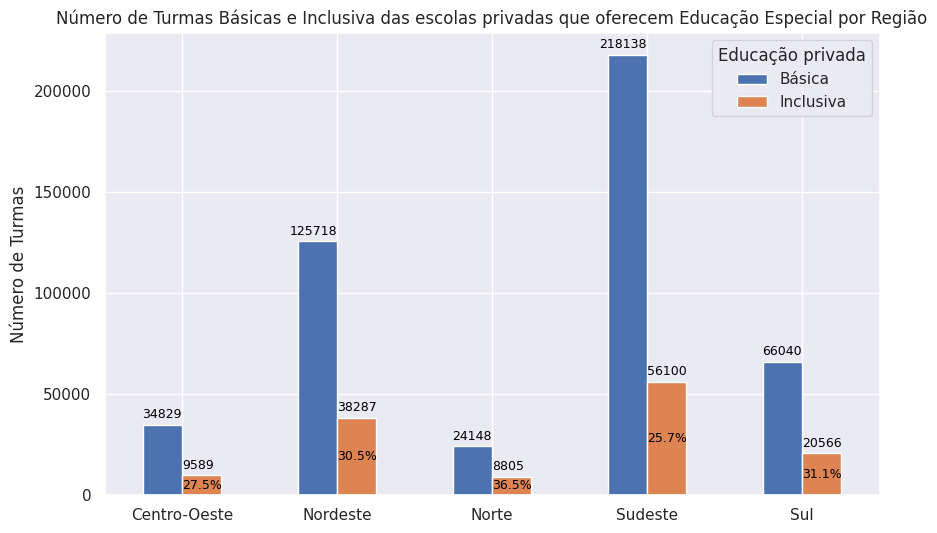

In [31]:
#Tomar cuidado com a ordem das regiões
dados = {
    "Regiao": sorted(list(set(publicas['NO_REGIAO']))),
    # a ordem dos dados influencia para associar a região
    "Básica": privadas[privadas['IN_ESP'] == 1].groupby(
        'NO_REGIAO')['QT_TUR_BAS'].sum().to_dict().values(),
    "Inclusiva": privadas[privadas['IN_ESP'] == 1].groupby(
        'NO_REGIAO')['QT_TUR_ESP_CC'].sum().to_dict().values()
}
df = pd.DataFrame(dados)
df.set_index("Regiao", inplace=True)
# Gráfico de barras agrupadas
ax = df.plot(kind='bar', figsize=(10, 6), stacked=False)
# Calculando a média da média de matriculas das escolas
#Adicionar os rotulos de porcentagens nas barras
for i, (priv, priv_cc) in enumerate(zip(df['Básica'], df['Inclusiva'])):
    # ax.text(x, y, texto, ...)
    # x - posição no eixo horizontal (a barra de cada região)
    # y - altura vertical onde o texto será colocado
    # texto - o que será escrito
    ax.text(i, priv+5000, f'{(priv)}', ha='right', va='center',
            color='black', fontsize=9)
    ax.text(i, priv_cc+5000, f'{(priv_cc)}', ha='left', va='center',
            color='black', fontsize=9)
    ax.text(i, priv_cc/2, f'{(priv_cc/priv)*100:.1f}%', ha='left', va='center',
            color='black', fontsize=9)
   
plt.title("Número de Turmas Básicas e Inclusiva das escolas privadas que \
oferecem Educação Especial por Região")
plt.ylabel("Número de Turmas")
plt.xlabel("")
plt.xticks(rotation=360)
plt.legend(title="Educação privada")
plt.show()

#### Média de alunos da educação especial por região

In [32]:
pub_mat_esp =  publicas.groupby('NO_REGIAO')['QT_MAT_ESP_CC'].sum().to_dict().values()
priv_mat_esp =  privadas.groupby('NO_REGIAO')['QT_MAT_ESP_CC'].sum().to_dict().values()
pub_tur_esp = publicas[publicas['IN_ESP'] == 1].groupby(
    'NO_REGIAO')['QT_TUR_ESP_CC'].sum().to_dict().values()

priv_tur_esp = privadas[privadas['IN_ESP'] == 1].groupby(
    'NO_REGIAO')['QT_TUR_ESP_CC'].sum().to_dict().values()
pub_med_tur = [mat/turma for mat, turma in zip(pub_mat_esp, pub_tur_esp)]
priv_med_tur = [mat/turma for mat, turma in zip(priv_mat_esp, priv_tur_esp)]

dados = {
    'Região': sorted(list(set(publicas['NO_REGIAO']))),
    'Públicas - Turmas Especiais Inclusivas': pub_tur_esp,
    'Privadas - Turmas Especiais Inclusivas': priv_tur_esp,
    'Públicas - Matriculas Especiais Inclusivas': pub_mat_esp,
    'Privadas - Matriculas Especiais Inclusivas': priv_mat_esp,
    'Públicas - Média': pub_med_tur,
    'Privadas - Média': priv_med_tur
}

df = pd.DataFrame(dados)
df.set_index("Região", inplace=True)
df

,Públicas - Turmas Especiais Inclusivas,Privadas - Turmas Especiais Inclusivas,Públicas - Matriculas Especiais Inclusivas,Privadas - Matriculas Especiais Inclusivas,Públicas - Média,Privadas - Média
Região,,,,,,
Centro-Oeste,71071,9589,134338,13683,1.890194,1.426948
Nordeste,285286,38287,587357,55912,2.058836,1.460339
Norte,99402,8805,178835,13753,1.799109,1.561953
Sudeste,327045,56100,562939,77522,1.721289,1.381854
Sul,145266,20566,267895,31458,1.844169,1.529612


### 📊 Indicadores e relações
- Qual a razão aluno/docente em escolas com Educação Especial?
- Existe correlação entre o número de turmas e o número de matrículas?

#### Mapa de correlação rede pública

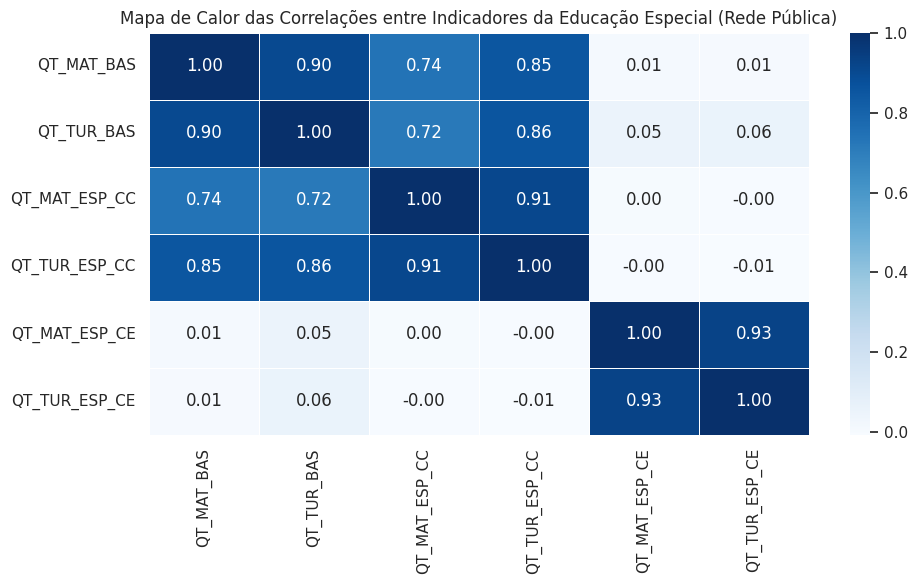

In [33]:
colunas = ['QT_MAT_BAS', 'QT_TUR_BAS', 
           'QT_MAT_ESP_CC', 'QT_TUR_ESP_CC', 
           'QT_MAT_ESP_CE', 'QT_TUR_ESP_CE']
df_heatmap = publicas[colunas].copy()

correlacao = df_heatmap.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='Blues', linewidths=0.5)
plt.title("Mapa de Calor das Correlações entre Indicadores da Educação Especial (Rede Pública)")
plt.tight_layout()
plt.show()

#### Mapa de correlação rede privada

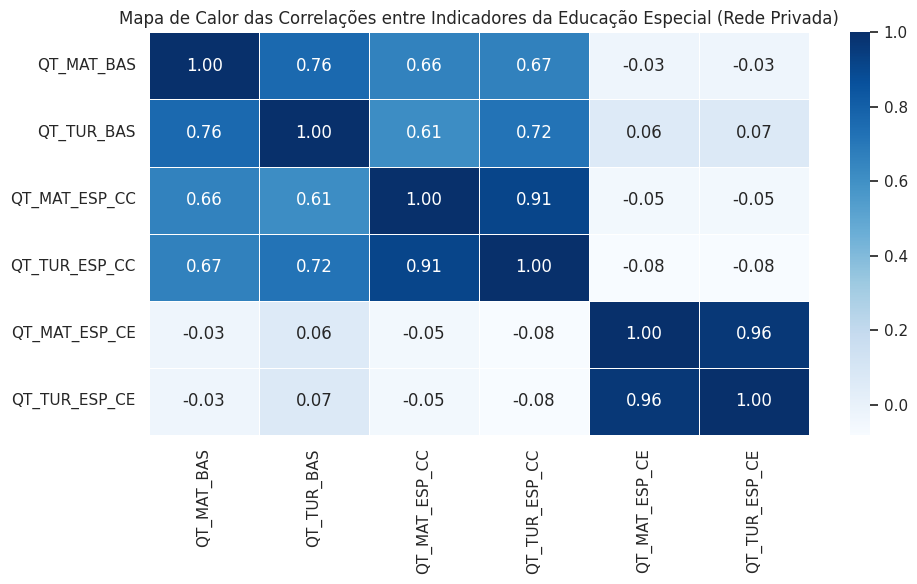

In [34]:
colunas = ['QT_MAT_BAS', 'QT_TUR_BAS', 
           'QT_MAT_ESP_CC', 'QT_TUR_ESP_CC', 
           'QT_MAT_ESP_CE', 'QT_TUR_ESP_CE']
df_heatmap = privadas[colunas].copy()

correlacao = df_heatmap.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='Blues', linewidths=0.5)
plt.title("Mapa de Calor das Correlações entre Indicadores da Educação Especial (Rede Privada)")
plt.tight_layout()
plt.show()